In [1]:
import numpy, pandas

In [2]:
import scipy, scipy.signal, scipy.optimize

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.shape

(7841, 88)

In [5]:
labels = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        labels.append(element)
    if 'CTRL_4H_' in element:
        labels.append(element)
    if 'ADRNOR_24H_' in element:
        labels.append(element)
    if 'CTRL_24H_' in element:
        labels.append(element)

working_labels=['adr4_a', 'adr4_b', 'adr4_c', 'ctl4_a', 'ctl4_b', 'ctl4_c', 'adr24_a', 'adr24_b', 'adr24_c', 'ctl24_a', 'ctl24_b', 'ctl24_c']
for i in range(12):
    print(working_labels[i], '\t', labels[i*2], labels[(i*2)+1])
    df.insert(0, 
              working_labels[i], 
              numpy.median(numpy.log(df.loc[:, [labels[i*2], labels[(i*2)+1]]] + 1), axis=1))

print(df.loc[:, 'ctl24_c'])
print(df.loc[:, ['CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']])

adr4_a 	 ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area
adr4_b 	 ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area
adr4_c 	 ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area
ctl4_a 	 CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area
ctl4_b 	 CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area
ctl4_c 	 CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area
adr24_a 	 ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area
adr24_b 	 ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area
adr24_c 	 ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area
ctl24_a 	 CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area
ctl24_b 	 CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area
ctl24_c 	 CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area
0       11.719279
1       11.154887
2        7.231888
3        9.714207
4        7.003186
          ...    
7836     7.680213
7837     7.764685
7838     7.244486
7839     5.485153
7840    11.734675
Name: ctl24_c, Length: 7841, dtype: float64
      CTRL_24H_3_1_2846 Area  CTRL_24H_3_2_2847 Area
0               122365.5000

In [6]:
# there are 2,074 duplicated measurements
print(df.shape)

duplicate_rows = df.duplicated(subset=working_labels)
print(sum(duplicate_rows))

df.drop_duplicates(subset=working_labels, inplace=True)
print(df.shape)

(7841, 100)
2073
(5768, 100)


In [7]:
expression = df.loc[:, working_labels]
expression

,adr4_a,adr4_b,adr4_c,ctl4_a,ctl4_b,ctl4_c,adr24_a,adr24_b,adr24_c,ctl24_a,ctl24_b,ctl24_c
0,11.089690,11.359786,11.580707,11.221475,10.970036,11.286449,11.466312,11.583596,11.437276,11.443728,11.453652,11.719279
1,10.539624,10.720655,11.177504,11.013481,10.808081,10.853943,11.006644,10.844701,11.163803,11.361712,11.258253,11.154887
2,7.028045,7.147585,6.495556,6.931726,6.866114,6.375641,6.433004,7.177947,6.885040,7.045449,6.640368,7.231888
3,10.902410,10.980639,9.052796,10.888755,10.480556,10.940800,9.914939,10.664074,10.311286,9.848295,9.732393,9.714207
4,5.842190,6.190384,6.824116,5.637878,5.750158,5.868486,6.762625,6.640592,6.355812,6.699990,7.134991,7.003186
...,...,...,...,...,...,...,...,...,...,...,...,...
7829,9.192957,9.577521,9.931599,9.685631,9.019008,9.514810,10.387437,9.397673,9.407410,9.957412,9.560982,9.968787
7832,7.659301,7.421529,7.126130,8.066812,7.689376,7.845064,6.959269,7.171046,7.401040,6.958457,7.287426,6.934432
7834,6.614916,7.266392,2.435619,6.681089,7.758462,7.404348,7.306753,7.535008,7.069419,6.642908,5.509871,7.215981
7836,7.321697,7.385367,8.245507,7.950564,7.508028,7.884967,7.828757,7.413506,7.247349,7.415316,8.050293,7.680213


In [8]:
numpy.exp(2)

7.38905609893065

['adr4_a', 'adr4_b', 'adr4_c']
(5768, 5)
(5765, 5)

115
['ctl4_a', 'ctl4_b', 'ctl4_c']
(5768, 5)
(5756, 5)

115
['adr24_a', 'adr24_b', 'adr24_c']
(5768, 5)
(5763, 5)

115
['ctl24_a', 'ctl24_b', 'ctl24_c']
(5768, 5)
(5759, 5)

115


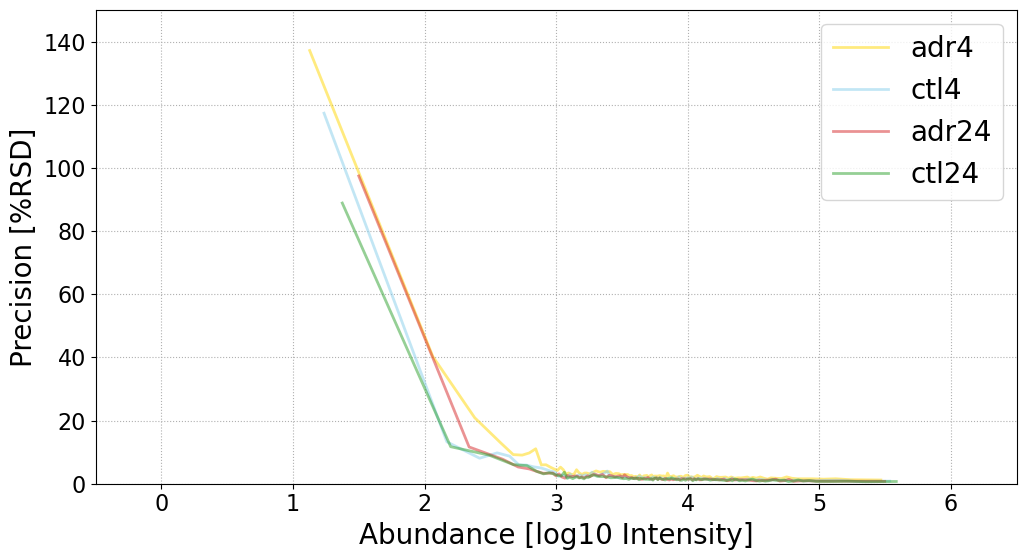

In [14]:
root_labels = ['adr4', 'ctl4', 'adr24', 'ctl24']
line_colors = ['gold', 'skyblue', 'tab:red', 'tab:green']

for i in range(len(root_labels)):
    
    root_label = root_labels[i]
    line_color = line_colors[i]
    
    working_labels = [element for element in expression.columns if root_label in element]
    print(working_labels)

    wdf = expression[working_labels]
    mean = numpy.mean(wdf, axis=1)
    std = numpy.std(wdf, axis=1)
    wdf.insert(0, 'mean', mean)
    wdf.insert(0, 'std', std) 

    print(wdf.shape)
    wdf = wdf[wdf['mean'] > 0]
    print(wdf.shape)
    
    wdf = wdf.sort_values('mean')
    print()

    cv = wdf['std'] / wdf['mean']
    cvi = numpy.sqrt((numpy.exp(1)**(cv**2)) - 1) # cv on log normal data, check wikipedia
    wdf.insert(0, 'cv', cvi)    

    x = []; y = []
    a = []; b = []
    for index, row in wdf.iterrows():
    
        a.append(row['mean'])
        b.append(row['cv']*100)
        if len(b) == 50:
            x.append(numpy.mean(a))
            y.append(numpy.mean(b))
            a = []; b = []
    print(len(x))
    matplotlib.pyplot.plot(numpy.log10(numpy.exp(x)), y, '-', lw=2, alpha=1/2, color=line_color, mec='none', label=root_label)
    #yhat = scipy.signal.savgol_filter(y, 21, 5)
    #matplotlib.pyplot.plot(numpy.log10(numpy.exp(x)), yhat, '-', lw=4, alpha=1/2, label=root_label, color=line_color)

matplotlib.pyplot.legend()
matplotlib.pyplot.xlim(-0.5, 6.5)
matplotlib.pyplot.ylim(0, 150)
matplotlib.pyplot.xlabel('Abundance [log10 Intensity]')
matplotlib.pyplot.ylabel('Precision [%RSD]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()